# Word Graph

### Installasi pymupdf

In [1]:
pip install --upgrade pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 22.8 MB/s eta 0:00:00


### Menghubungkan Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Membaca Paper dan Membuat file txt

In [ ]:
import pymupdf

doc = pymupdf.open("/content/drive/MyDrive/76_A+Stratified+Modeling-Machine+Learning+Approach+to+Improve+the+Accuracy+of+Non-Invasive+Bloo.pdf") # open a document
out = open("output.txt", "wb") # create a text output
for page in doc: # iterate the document pages
    text = page.get_text().encode("utf8") # get plain text (is in UTF-8)
    out.write(text) # write text of page
    out.write(bytes((12,))) # write page delimiter (form feed 0x0C).
out.close()

### Installasi nltk

In [4]:
%%capture
!pip install nltk

### Installasi Library nltk

In [5]:
import nltk
nltk.download('punkt')  # hanya perlu sekali
nltk.download('punkt_tab')  # opsional, untuk versi terbaru NLTK (≥3.8.2)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

### Membaca file txt

In [6]:
with open('output.txt', 'r', encoding='utf-8') as file:
    teks = file.read()

print(teks[:200])  # tampilkan 200 karakter pertama

	
76	
International Journal of Online and Biomedical Engineering (iJOE)	
iJOE | Vol. 21 No. 6 (2025)
iJOE  |  eISSN: 2626-8493  |  Vol. 21 No. 6 (2025)  | 
JOE
International Journal of 
Online and Bio


### Membaca kalimat

In [7]:
# Install: pip install nltk
import nltk


#text = "Ini adalah kalimat pertama. Ini kalimat kedua? Ya!"
sentences = nltk.sent_tokenize(teks)
print(sentences)
# Output: ['Ini adalah kalimat pertama.', 'Ini kalimat kedua?', 'Ya!']

['\t\n76\t\nInternational Journal of Online and Biomedical Engineering (iJOE)\t\niJOE | Vol.', '21 No.', '6 (2025)\niJOE\u2002 |\u2002 eISSN: 2626-8493\u2002 |\u2002 Vol.', '21 No.', '6 (2025)\u2002 |\u2002\nJOE\nInternational Journal of \nOnline and Biomedical Engineering\nFitrilina, Rusydi, M.I., Kurnia, R., Windasari, N., Putra, R.Z.', '(2025).', 'A Stratified Modeling-Machine Learning Approach to Improve the Accuracy \nof Non-Invasive Blood Glucose Estimation Using Photoplethysmography Signals.', 'International Journal of Online and Biomedical Engineering (iJOE), \n21(6), pp.', '76–96.', 'https://doi.org/10.3991/ijoe.v21i06.53815\nArticle submitted 2024-12-12.', 'Revision uploaded 2025-01-30.', 'Final acceptance 2025-01-30.', '© 2025 by the authors of this article.', 'Published under CC-BY.', 'Online-Journals.org\nPAPER\nA Stratified Modeling-Machine Learning Approach \nto Improve the Accuracy of Non-Invasive Blood Glucose \nEstimation Using Photoplethysmography Signals\nABSTRACT\n

### Mengubah sekumpulan data (list) menjadi bentuk tabel (DataFrame)

In [8]:
import pandas as pd
df = pd.DataFrame(sentences, columns=['kalimat'])
print(df)

                                               kalimat
0    \t\n76\t\nInternational Journal of Online and ...
1                                               21 No.
2         6 (2025)\niJOE  |  eISSN: 2626-8493  |  Vol.
3                                               21 No.
4    6 (2025)  | \nJOE\nInternational Journal of \n...
..                                                 ...
602  She continued specialist education in \nForens...
603  Currently, Dr. Winda is the Head of the Depart...
604  She is \nalso the Secretary of the Research Et...
605  Raffi Zahrandhika Putra graduated with a Bache...
606  He is currently working as a \nSpecialist Cons...

[607 rows x 1 columns]


### Import data di atas menjadi csv

In [9]:
df.to_csv('kalimat.csv', index=False, encoding='utf-8')

### Jumlah Kata

In [22]:
import pandas as pd
import re

# --- Konfigurasi ---
file_name = 'kalimat.csv'

# --- 1. Memuat Data ---
try:
    df = pd.read_csv(file_name, encoding='utf-8')
except FileNotFoundError:
    print(f"Error: File '{file_name}' tidak ditemukan. Pastikan file berada di lokasi yang benar.")
    exit()

# Memastikan kolom 'kalimat' adalah string dan menangani nilai kosong (NaN)
df['kalimat'] = df['kalimat'].astype(str).fillna('')

# Menggabungkan semua kalimat menjadi satu teks besar
text = " ".join(df['kalimat'])


# --- 2. Tokenisasi dan Penghitungan ---

# A. Menghitung Kata Alfanumerik (huruf dan angka)
# Menggunakan regex untuk menemukan kata (urutan karakter huruf/angka)
words = re.findall(r'\b\w+\b', text.lower())
total_alpha_words = len(words)
total_unique_alpha_words = len(set(words))

# B. Menghitung Total Token (Perkiraan)
# Menghitung item yang dipisahkan oleh spasi
total_tokens_approx = len(text.split())


# --- 3. Format Output Menjadi Tabel Teks Rapi ---

# Data yang akan ditampilkan
output_data = [
    {"Kategori": "Total Kata", "Jumlah": total_alpha_words, "Keterangan": "Jumlah keseluruhan kata alfanumerik (mengabaikan tanda baca)."},
    {"Kategori": "Total Kata Unik", "Jumlah": total_unique_alpha_words, "Keterangan": "Jumlah kata alfanumerik yang berbeda (kosakata)."},
    {"Kategori": "Total Token (Perkiraan)", "Jumlah": total_tokens_approx, "Keterangan": "Jumlah item yang dipisahkan oleh spasi (termasuk tanda baca yang menempel)."}
]

# Mendefinisikan lebar kolom agar rapi
LEBAR_KATEGORI = 25
LEBAR_JUMLAH = 10
LEBAR_KETERANGAN = 65

# Header Tabel
header = (
    f"| {'Kategori':<{LEBAR_KATEGORI}} | {'Jumlah':<{LEBAR_JUMLAH}} | {'Keterangan':<{LEBAR_KETERANGAN}} |"
)

# Garis Pembatas
separator = (
    f"+{'-' * (LEBAR_KATEGORI + 2)}"
    f"+{'-' * (LEBAR_JUMLAH + 2)}"
    f"+{'-' * (LEBAR_KETERANGAN + 2)}+"
)

# --- 4. Menampilkan Hasil ---

print("\n--- Hasil Analisis Kata dari 'kalimat.csv' ---")
print(separator)
print(header)
print(separator)

# Menampilkan setiap baris data
for item in output_data:
    print(
        f"| {item['Kategori']:<{LEBAR_KATEGORI}} "
        f"| {item['Jumlah']:<{LEBAR_JUMLAH}} "
        f"| {item['Keterangan']:<{LEBAR_KETERANGAN}} |"
    )

print(separator)


--- Hasil Analisis Kata dari 'kalimat.csv' ---
+---------------------------+------------+-------------------------------------------------------------------+
| Kategori                  | Jumlah     | Keterangan                                                        |
+---------------------------+------------+-------------------------------------------------------------------+
| Total Kata                | 9504       | Jumlah keseluruhan kata alfanumerik (mengabaikan tanda baca).     |
| Total Kata Unik           | 2129       | Jumlah kata alfanumerik yang berbeda (kosakata).                  |
| Total Token (Perkiraan)   | 8588       | Jumlah item yang dipisahkan oleh spasi (termasuk tanda baca yang menempel). |
+---------------------------+------------+-------------------------------------------------------------------+


Untuk membuat word graph

Lanjutkan dengan menggunakan https://www.geeksforgeeks.org/nlp/co-occurence-matrix-in-nlp/

### Co-occurrence Matrix (Matriks Kemunculan Bersama)

In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict, Counter
import numpy as np
import pandas as pd
import re  # Import modul regex

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Baca file CSV
df = pd.read_csv('kalimat.csv', encoding='utf-8')
text = " ".join(df['kalimat'].astype(str))

# --- MODIFIKASI: Hapus semua angka dari teks ---
text = re.sub(r'\d+', '', text)
# -----------------------------------------------

# Preprocess the text
stop_words = set(stopwords.words('english'))
words = word_tokenize(text.lower())

# Gunakan isalpha() agar hanya kata yang mengandung huruf saja yang diambil (memastikan tidak ada angka/simbol tersisa)
words = [word for word in words if word.isalpha() and word not in stop_words]

# Define the window size for co-occurrence
window_size = 2

# Create a list of co-occurring word pairs
co_occurrences = defaultdict(Counter)
for i, word in enumerate(words):
    for j in range(max(0, i - window_size), min(len(words), i + window_size + 1)):
        if i != j:
            co_occurrences[word][words[j]] += 1

# Create a list of unique words
unique_words = list(set(words))

# Initialize the co-occurrence matrix
co_matrix = np.zeros((len(unique_words), len(unique_words)), dtype=int)

# Populate the co-occurrence matrix
word_index = {word: idx for idx, word in enumerate(unique_words)}
for word, neighbors in co_occurrences.items():
    for neighbor, count in neighbors.items():
        co_matrix[word_index[word]][word_index[neighbor]] = count

# Create a DataFrame for better readability
co_matrix_df = pd.DataFrame(co_matrix, index=unique_words, columns=unique_words)

# Display the co-occurrence matrix
co_matrix_df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,direct,mohanty,ysis,photoplethysmographic,utilized,addressing,playing,measured,baik,external,...,applicability,proposed,years,entails,difficult,alifian,verma,adults,sively,biomed
direct,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mohanty,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ysis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
photoplethysmographic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
utilized,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
alifian,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
verma,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
adults,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
sively,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Installasi networkx

In [23]:
%%capture
pip install networkx

### mengubah data matriks (tabel angka) menjadi struktur Graf Jaringan (Network Graph)

In [24]:
import networkx as nx
arr = co_matrix_df.to_numpy()
G=nx.from_numpy_array(arr)


### Visualisai Word Graph Node dengan Label angka

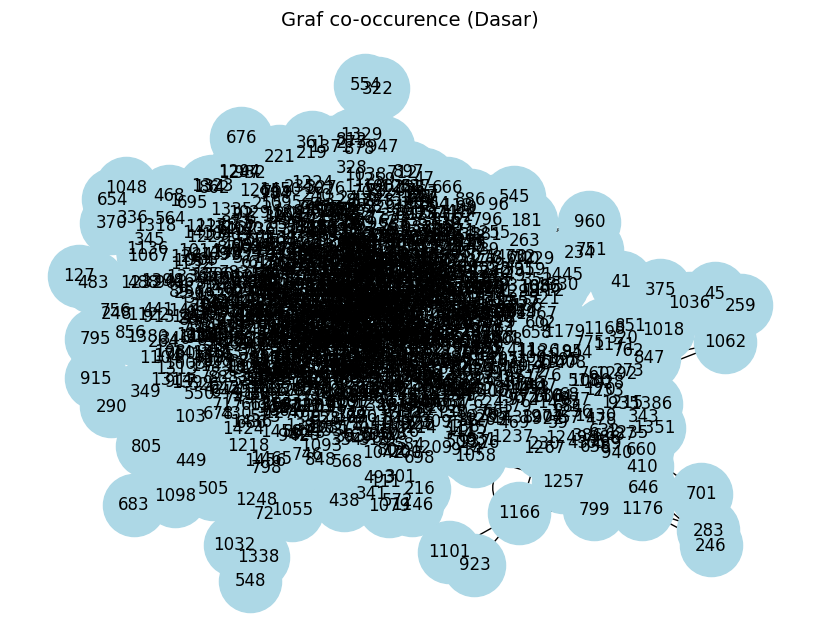

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=2000, font_size=12)
plt.title("Graf co-occurence (Dasar)", fontsize=14)
plt.show()

### Visualisai Word Graph Node dengan Label Kata

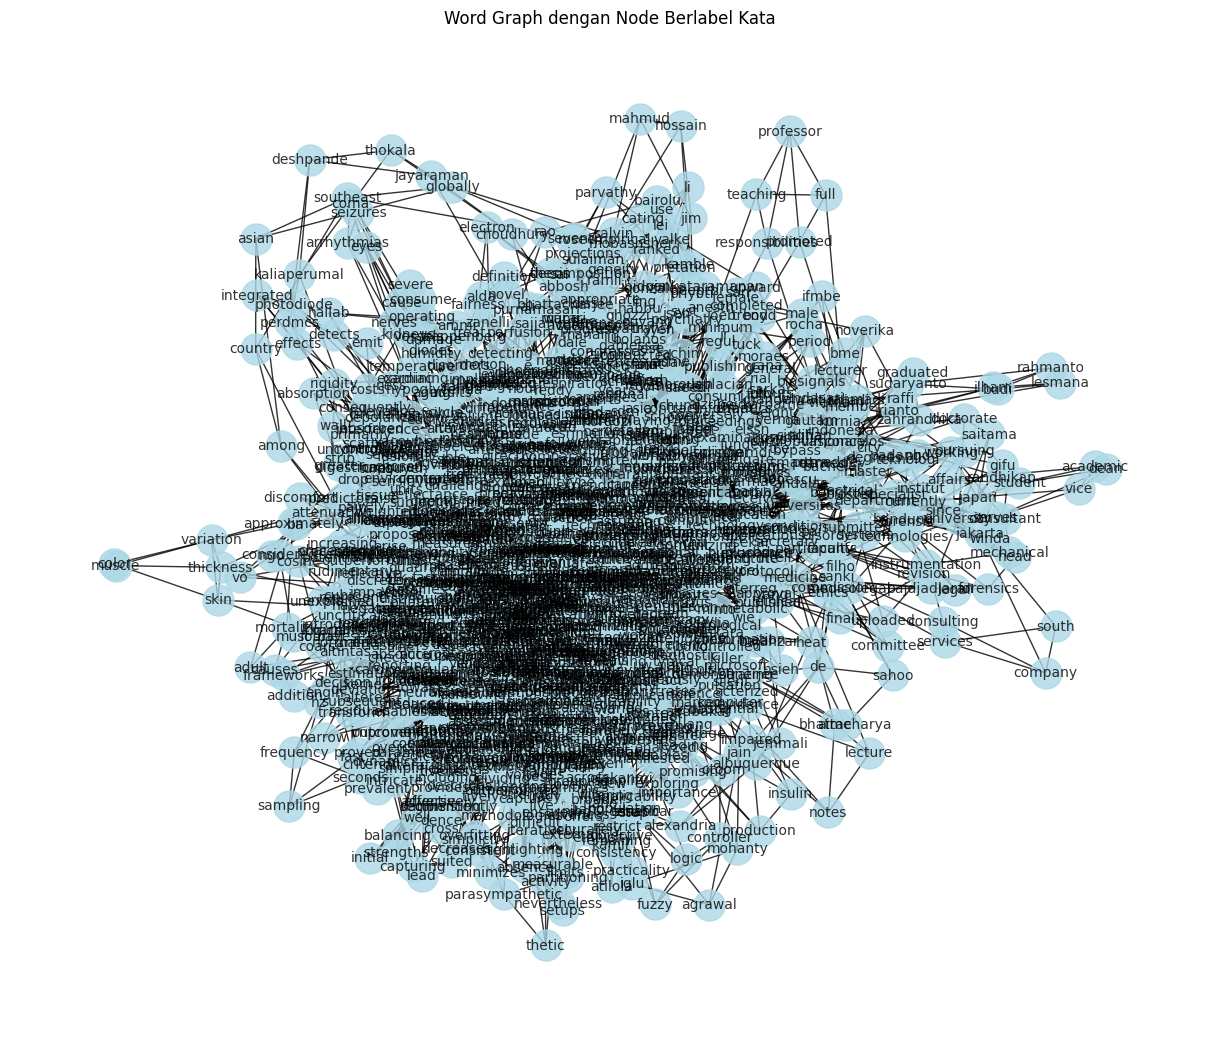

In [26]:
# Pastikan 'unique_words' sudah terdefinisi dari cell sebelumnya
mapping_labels = {i: word for i, word in enumerate(unique_words)}

plt.figure(figsize=(12, 10))
nx.draw(
    G,
    labels=mapping_labels,
    with_labels=True,
    node_size=500,
    node_color='lightblue',
    font_size=10,
    alpha=0.8
)
plt.title("Word Graph dengan Node Berlabel Kata")
plt.show()

### mengubah label titik (node) pada graf yang tadinya berupa angka indeks (0, 1, 2...) kembali menjadi kata aslinya (teks)

In [16]:
mapping = {i: word for i, word in enumerate(unique_words)}
G = nx.relabel_nodes(G, mapping)


### menghitung tingkat kepentingan (PageRank) setiap kata dan menampilkan 10 kata kunci (keywords) paling dominan

In [28]:
pr = nx.pagerank(G, alpha=0.85)
pr_df = pd.DataFrame(list(pr.items()), columns=['Kata', 'PageRank']).sort_values(by='PageRank', ascending=False)
print(pr_df.head(10))


      Kata  PageRank
1352  1352  0.020226
524    524  0.015723
857    857  0.013133
577    577  0.010470
1304  1304  0.009309
1412  1412  0.009101
1155  1155  0.008982
680    680  0.008517
1362  1362  0.007760
14      14  0.006703


In [29]:
self_loops = list(nx.selfloop_edges(G))
print("Self-loop edges:", self_loops)

Self-loop edges: [(14, 14), (39, 39), (124, 124), (161, 161), (249, 249), (333, 333), (449, 449), (487, 487), (490, 490), (495, 495), (517, 517), (524, 524), (559, 559), (623, 623), (662, 662), (673, 673), (680, 680), (687, 687), (766, 766), (835, 835), (868, 868), (874, 874), (928, 928), (938, 938), (946, 946), (958, 958), (974, 974), (982, 982), (986, 986), (1033, 1033), (1100, 1100), (1145, 1145), (1166, 1166), (1172, 1172), (1190, 1190), (1192, 1192), (1202, 1202), (1231, 1231), (1253, 1253), (1266, 1266), (1304, 1304), (1305, 1305), (1343, 1343), (1352, 1352), (1362, 1362)]


In [30]:
mapping = {i: word for i, word in enumerate(unique_words)}
G = nx.relabel_nodes(G, mapping)

In [31]:
self_loops = list(nx.selfloop_edges(G))
print("Self-loop edges:", self_loops)

Self-loop edges: [('ppg', 'ppg'), ('ahmad', 'ahmad'), ('testing', 'testing'), ('table', 'table'), ('predictive', 'predictive'), ('optical', 'optical'), ('vasconcelos', 'vasconcelos'), ('ijoe', 'ijoe'), ('linear', 'linear'), ('samples', 'samples'), ('model', 'model'), ('blood', 'blood'), ('r', 'r'), ('newcas', 'newcas'), ('medicine', 'medicine'), ('chen', 'chen'), ('regression', 'regression'), ('stratiﬁcation', 'stratiﬁcation'), ('sensors', 'sensors'), ('opt', 'opt'), ('million', 'million'), ('validation', 'validation'), ('n', 'n'), ('methods', 'methods'), ('correlation', 'correlation'), ('kim', 'kim'), ('bengkulu', 'bengkulu'), ('sensor', 'sensor'), ('engineering', 'engineering'), ('yang', 'yang'), ('region', 'region'), ('energy', 'energy'), ('jakarta', 'jakarta'), ('stratum', 'stratum'), ('b', 'b'), ('gaussian', 'gaussian'), ('liu', 'liu'), ('mondal', 'mondal'), ('classification', 'classification'), ('sub', 'sub'), ('diabetes', 'diabetes'), ('invasive', 'invasive'), ('training', 'trai